<a href="https://colab.research.google.com/github/vardhanreddy2003/DeepLearning_projects/blob/main/pneumoniadetection(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:12<00:00, 271MB/s]
100% 2.29G/2.29G [00:12<00:00, 203MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile("/content/chest-xray-pneumonia.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dense,MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2

In [6]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/chest_xray/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 5216 files belonging to 2 classes.


In [7]:
test_ds=keras.utils.image_dataset_from_directory(
    directory="/content/chest_xray/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 624 files belonging to 2 classes.


In [8]:
from keras.layers import Dropout

In [10]:
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [29]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu",kernel_regularizer=l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(64,activation="relu",kernel_regularizer=l2(0.01)))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy","precision","recall"])

In [32]:
from keras.callbacks import EarlyStopping

In [33]:
callback=EarlyStopping(
    monitor="val_loss",
    patience=2,
    mode="auto",
    restore_best_weights=True

)

In [34]:
history=model.fit(train_ds,epochs=10,batch_size=32,validation_data=test_ds)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 249ms/step - accuracy: 0.8311 - loss: 1.5860 - precision: 0.8447 - recall: 0.9528 - val_accuracy: 0.7564 - val_loss: 0.8052 - val_precision: 0.7204 - val_recall: 0.9974
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 237ms/step - accuracy: 0.9453 - loss: 0.3846 - precision: 0.9599 - recall: 0.9672 - val_accuracy: 0.8109 - val_loss: 0.6404 - val_precision: 0.7810 - val_recall: 0.9692
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 239ms/step - accuracy: 0.9422 - loss: 0.3466 - precision: 0.9597 - recall: 0.9629 - val_accuracy: 0.6971 - val_loss: 1.0720 - val_precision: 0.6742 - val_recall: 0.9974
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - accuracy: 0.9434 - loss: 0.2653 - precision: 0.9619 - recall: 0.9621 - val_accuracy: 0.7660 - val_loss: 0.6400 - val_precision: 0.7311 - val_recall: 0.9897
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 239ms/step - accuracy: 0.9556 - loss: 0.2206 - precision: 0.9722 - recall: 0.9681 - val_accuracy: 0.6923

In [36]:
plt.show(history.history["recall"])
plt.show(history.history["val_recall"])

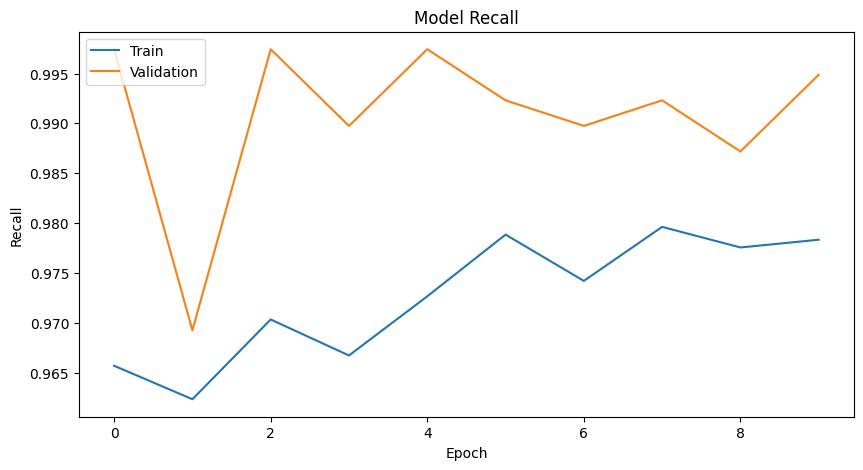

In [37]:
# prompt: write code to test penumona_image

import matplotlib.pyplot as plt

# Assuming 'history' is the variable holding the training history from model.fit
# If not, replace 'history' with the actual variable name

# Plot training & validation recall values
plt.figure(figsize=(10, 5))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the image
img_path ="/content/pneumonia_image.jpg"
img = load_img(img_path, target_size=(256, 256))  # Resize to match model input shape

# Preprocess the image
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict using the model
predictions = model.predict(img_array)

print("Model Predictions:", predictions)
threshold = 0.5  # You can adjust this value
prediction_class = (predictions[0][0] >= threshold)
print("Prediction Class:", "Positive" if prediction_class else "Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model Predictions: [[0.8840881]]
Prediction Class: Positive
